<a href="https://colab.research.google.com/github/Sankalpa0011/ANN-MNIST-Digit-Classification/blob/main/CNN_MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.models import Sequential

In [2]:
# Set random seed for reproducibility
tf.random.set_seed(3)

In [3]:
# Load the MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
# Reshape the data for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [6]:
# Model architecture with CNN
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPool2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPool2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 11, 11, 64)        2

In [7]:
# Train the model
history = model.fit(x_train, y_train, epochs=20, validation_split=0.1, batch_size=32)

Epoch 1/20
1688/1688 [==============================] - 21s 8ms/step - loss: 0.3935 - accuracy: 0.8848 - val_loss: 0.0484 - val_accuracy: 0.9865
Epoch 2/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1424 - accuracy: 0.9625 - val_loss: 0.0430 - val_accuracy: 0.9882
Epoch 3/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1170 - accuracy: 0.9690 - val_loss: 0.0378 - val_accuracy: 0.9895
Epoch 4/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0989 - accuracy: 0.9742 - val_loss: 0.0378 - val_accuracy: 0.9910
Epoch 5/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0855 - accuracy: 0.9780 - val_loss: 0.0362 - val_accuracy: 0.9900
Epoch 6/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0807 - accuracy: 0.9792 - val_loss: 0.0374 - val_accuracy: 0.9907
Epoch 7/20
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0767 - accuracy: 0.9807 - val_loss: 0.0369 - val_accura

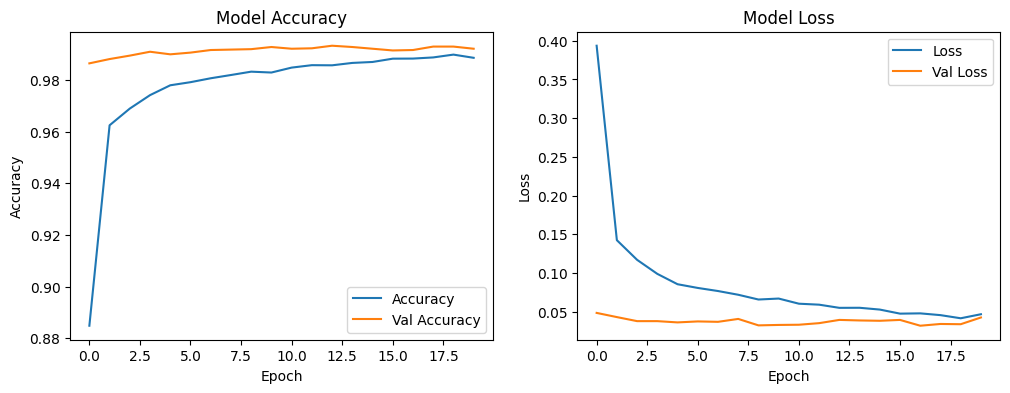

In [8]:
# Visualize the accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 1s - loss: 0.0333 - accuracy: 0.9926 - 858ms/epoch - 3ms/step

Test accuracy: 0.9926000237464905


In [10]:
# Confusion matrix
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_labels)
cm

313/313 [==============================] - 1s 2ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 978,    0,    1,    0,    0,    0,    0,    1,    0,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,    0, 1028,    0,    0,    0,    0,    3,    0,    0],
       [   0,    0,    0, 1006,    0,    1,    0,    2,    1,    0],
       [   0,    1,    0,    0,  976,    0,    4,    0,    0,    1],
       [   2,    0,    1,    7,    0,  879,    1,    1,    0,    1],
       [   3,    2,    0,    0,    1,    1,  951,    0,    0,    0],
       [   0,    3,    3,    0,    0,    0,    0, 1021,    1,    0],
       [   3,    0,    3,    1,    0,    1,    0,    0,  963,    3],
       [   1,    1,    0,    0,    8,    4,    0,    6,    0,  989]],
      dtype=int32)>

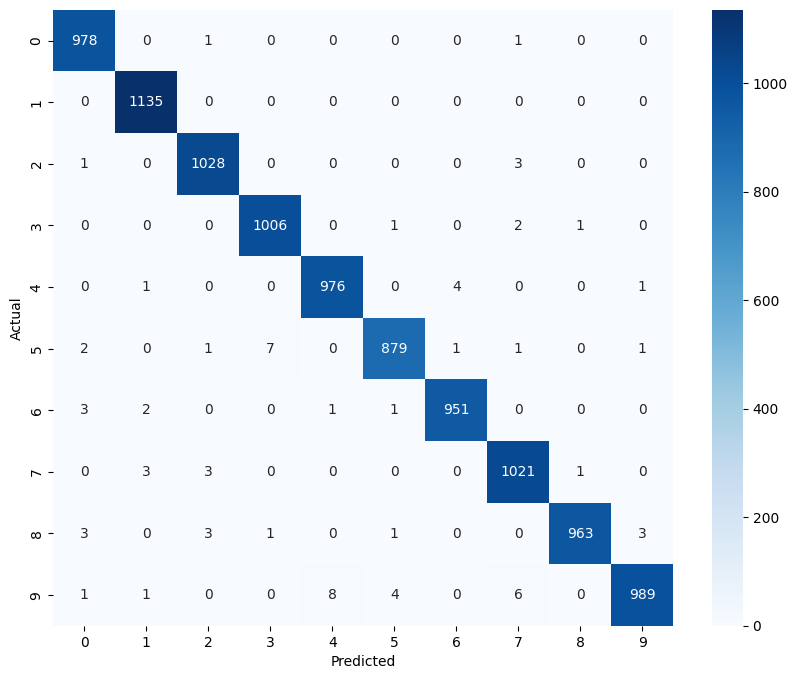

In [11]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **Predictions**

In [12]:
y_pred = model.predict(x_test)  # give the prediction probabilities of each class for that data point
y_pred.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [13]:
# convert the prediction probabilities to class label for all test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [14]:
confusion_matrix(y_test, y_pred_labels)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 978,    0,    1,    0,    0,    0,    0,    1,    0,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,    0, 1028,    0,    0,    0,    0,    3,    0,    0],
       [   0,    0,    0, 1006,    0,    1,    0,    2,    1,    0],
       [   0,    1,    0,    0,  976,    0,    4,    0,    0,    1],
       [   2,    0,    1,    7,    0,  879,    1,    1,    0,    1],
       [   3,    2,    0,    0,    1,    1,  951,    0,    0,    0],
       [   0,    3,    3,    0,    0,    0,    0, 1021,    1,    0],
       [   3,    0,    3,    1,    0,    1,    0,    0,  963,    3],
       [   1,    1,    0,    0,    8,    4,    0,    6,    0,  989]],
      dtype=int32)>

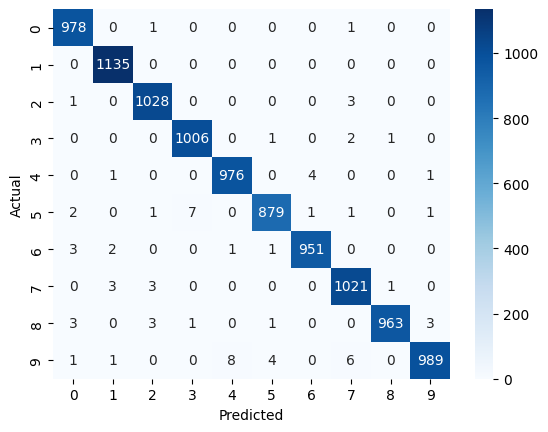

In [15]:
sns.heatmap(confusion_matrix(y_test, y_pred_labels), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **Predictive System**

Enter the image path: /content/8.jpeg


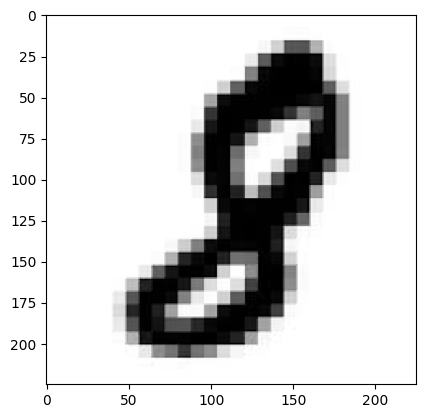

1/1 [==============================] - 0s 27ms/step
The Handwritten Digit is a  8


In [17]:
input_img_path = input("Enter the image path: ")
input_img = cv2.imread(input_img_path)

# Check if the image was loaded successfully
if input_img is None:
    print("Error: Could not load image. Please check the file path and try again.")
else:
    plt.imshow(input_img)
    plt.show()

    grayscale = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)
    input_img_resize = cv2.resize(grayscale, (28, 28))
    input_img_resize = input_img_resize/255
    img_reshaped = np.reshape(input_img_resize, [1, 28, 28, 1]) # Reshape to include channel dimension

    input_prediction = model.predict(img_reshaped) # No need to expand dims, already in correct shape
    input_pred_label = np.argmax(input_prediction)
    print("The Handwritten Digit is a ", input_pred_label)